<a href="https://colab.research.google.com/github/hamdansyaif/DeepLearning/blob/main/Week_1/Income/income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas 1:**
1. Buat model Deep learning (PyTorch and Tensorflow).
2. Bandingkan Matriks Evaluasi (Akurasi,Presisi,Recall,F1Squared, AUC, ROC). Matriks Evaluasi mana yang terbaik? Jelaskan!
3. Beri penjelasan untuk setiap persamaan matematika yang ada.


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None

First 5 Rows:
   age         workclass  fnlwgt  education  education

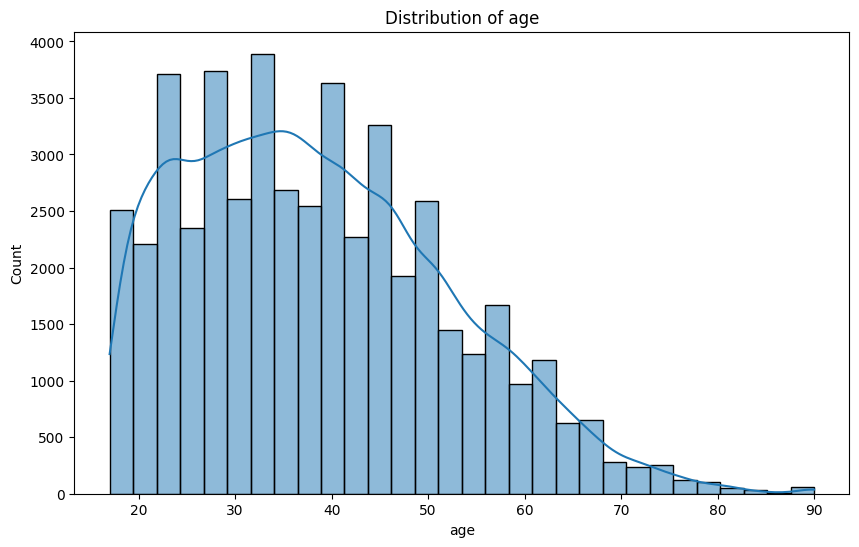

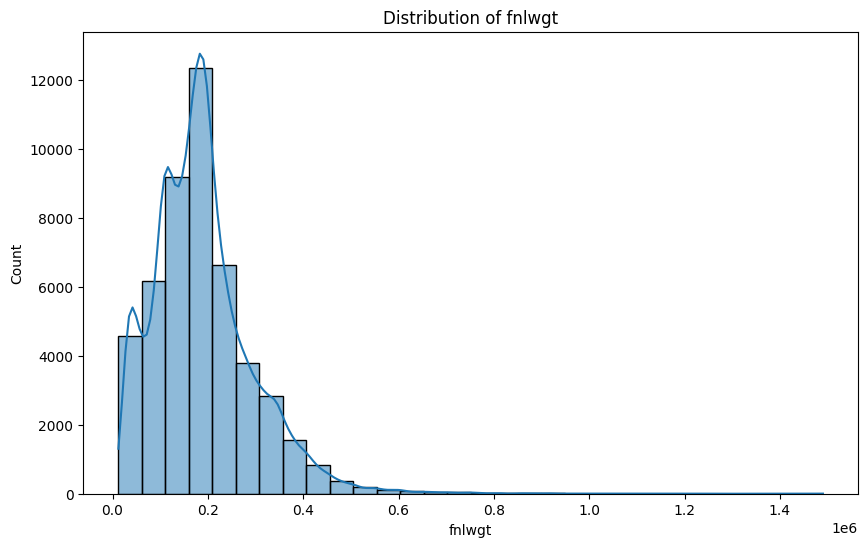

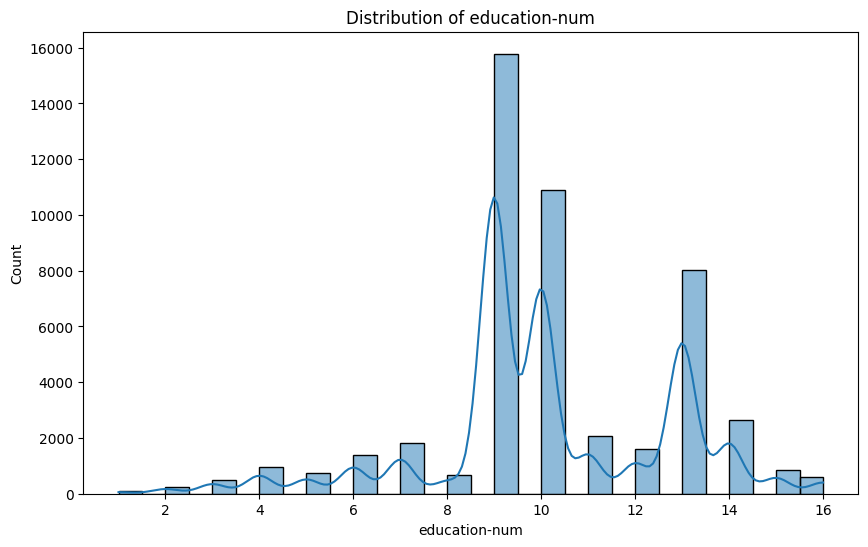

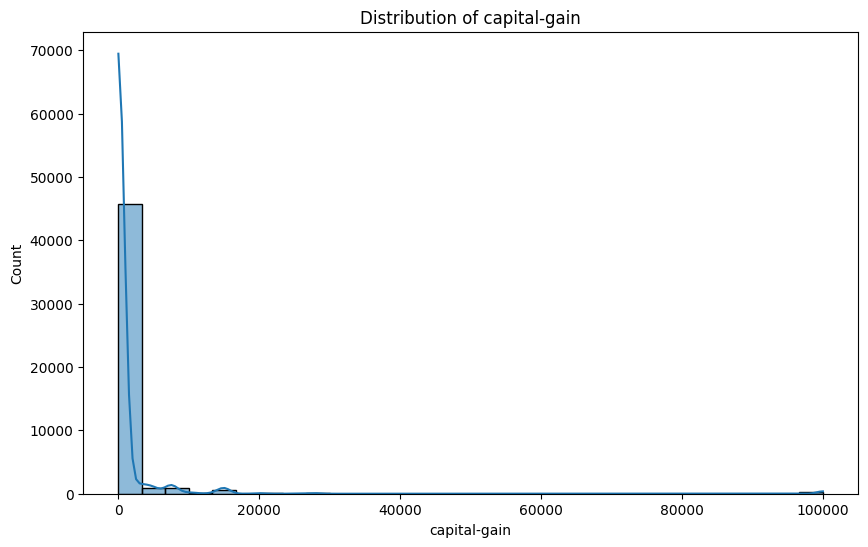

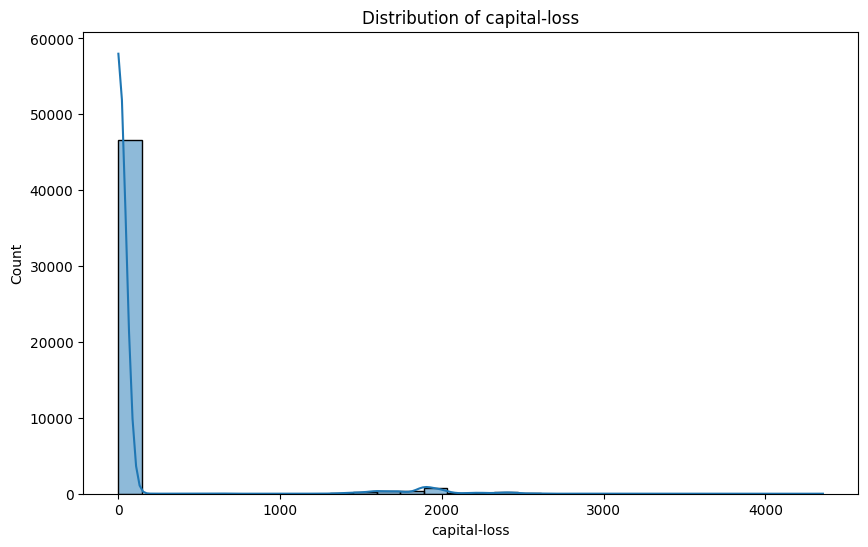

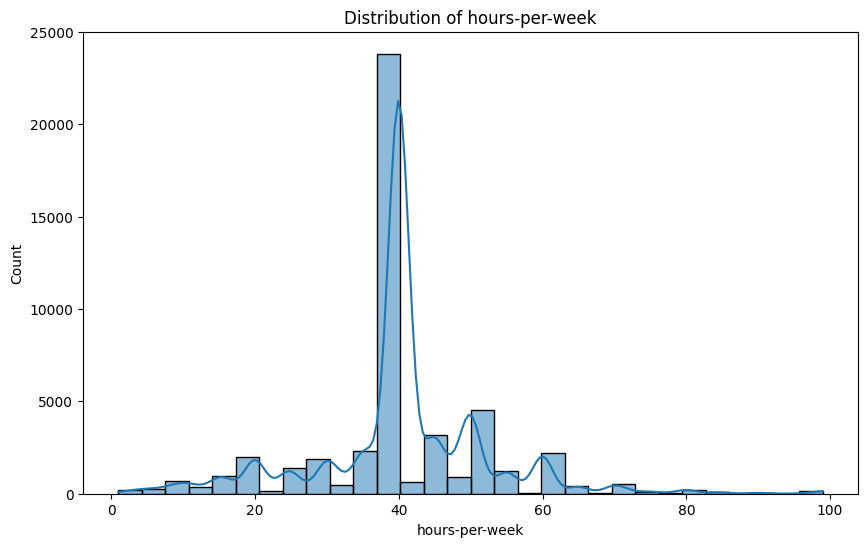

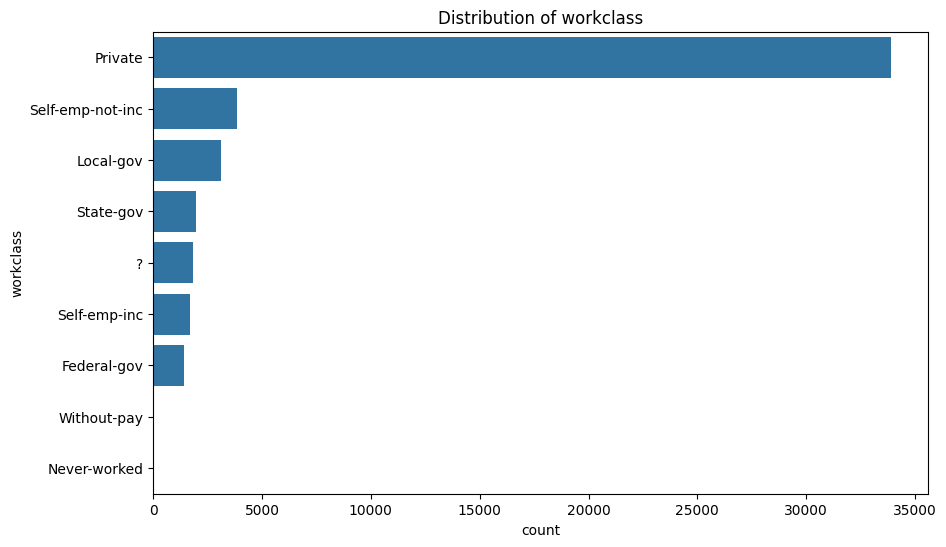

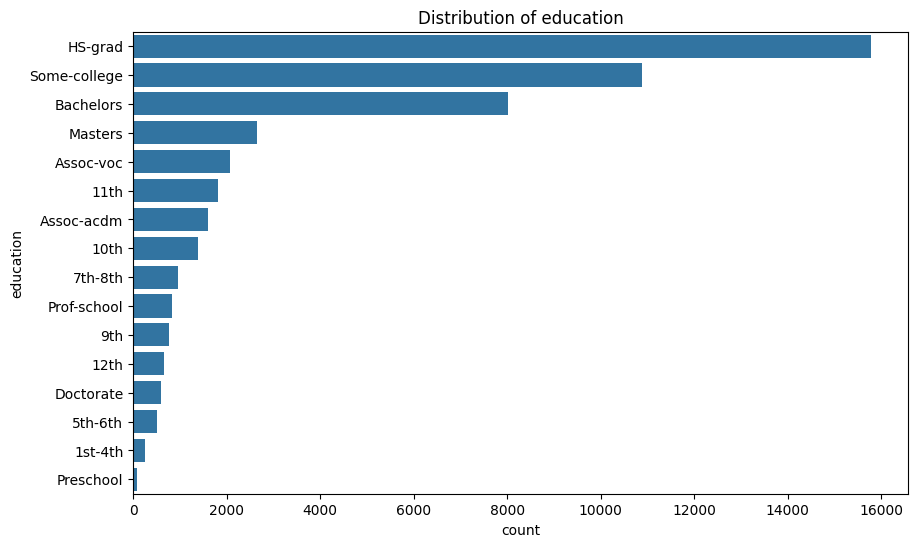

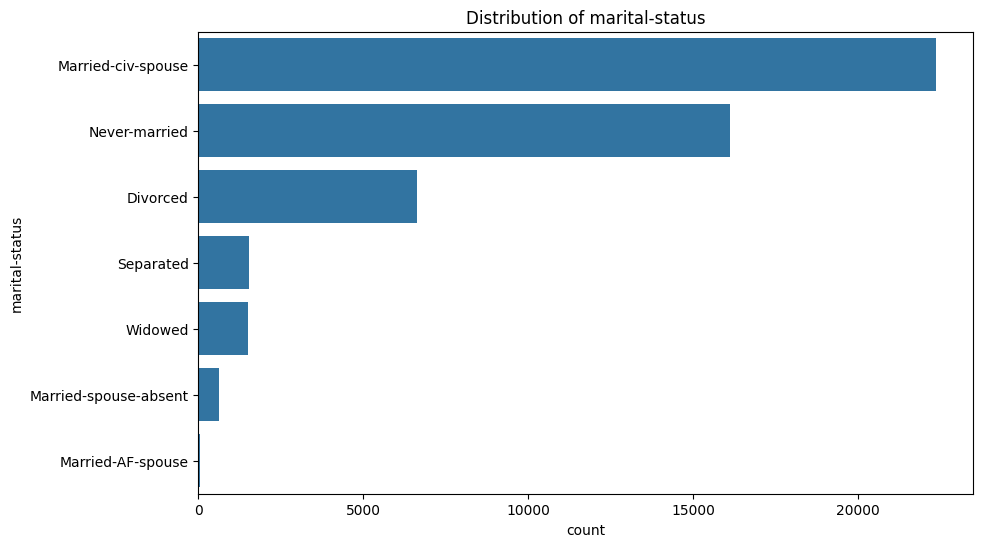

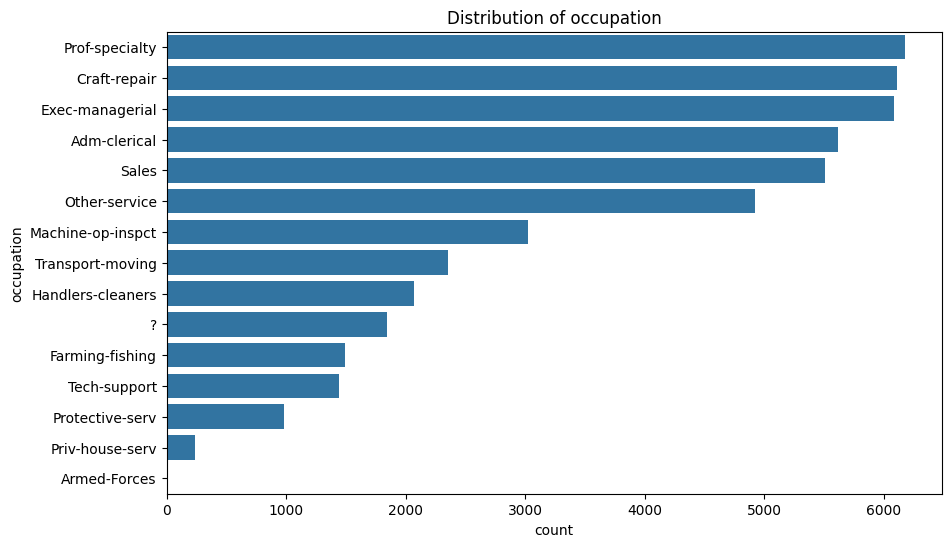

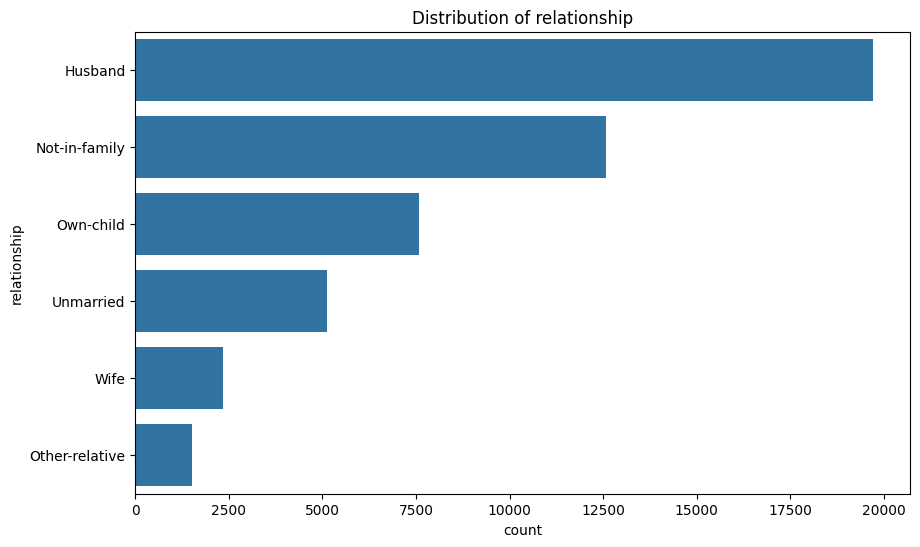

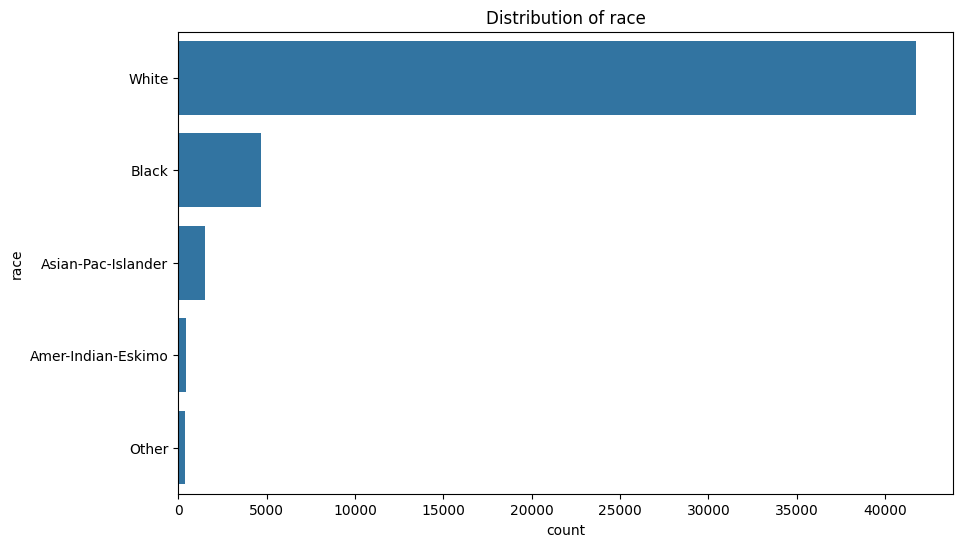

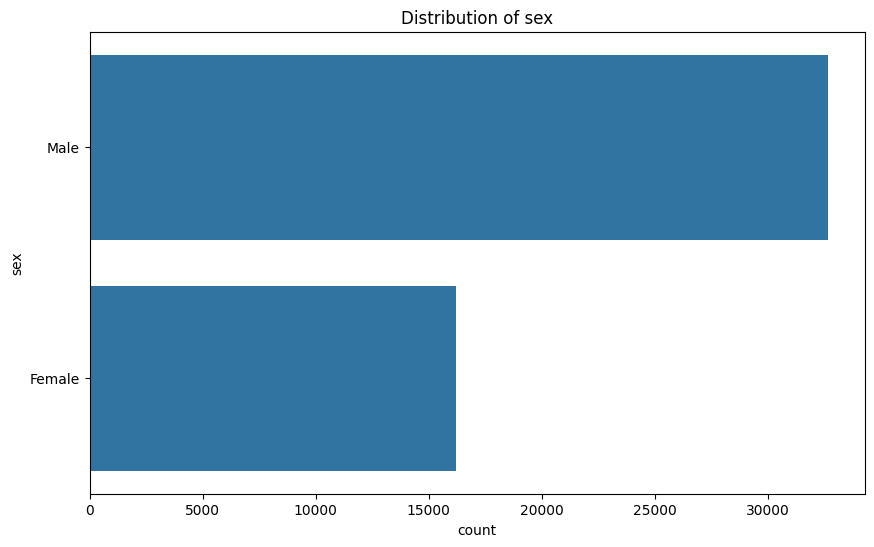

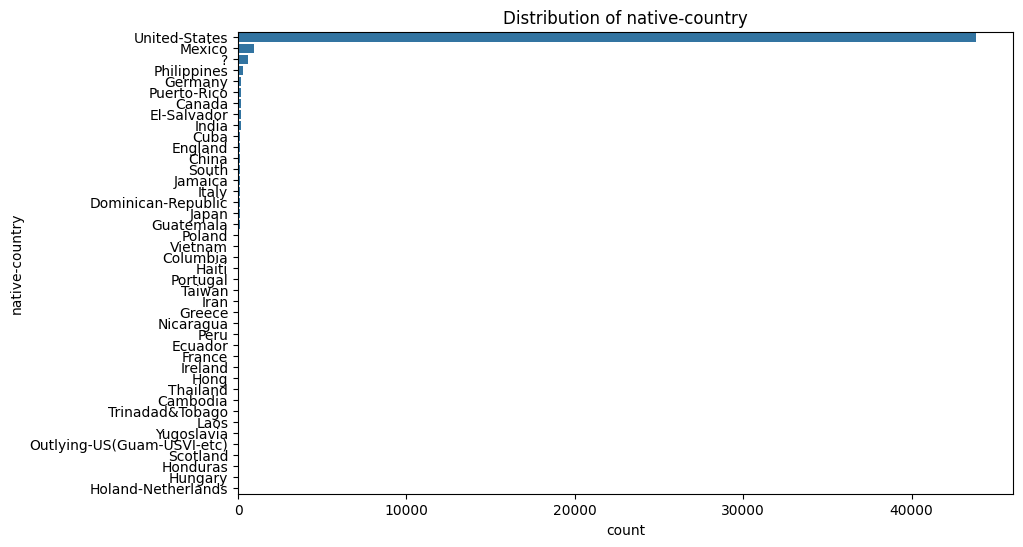

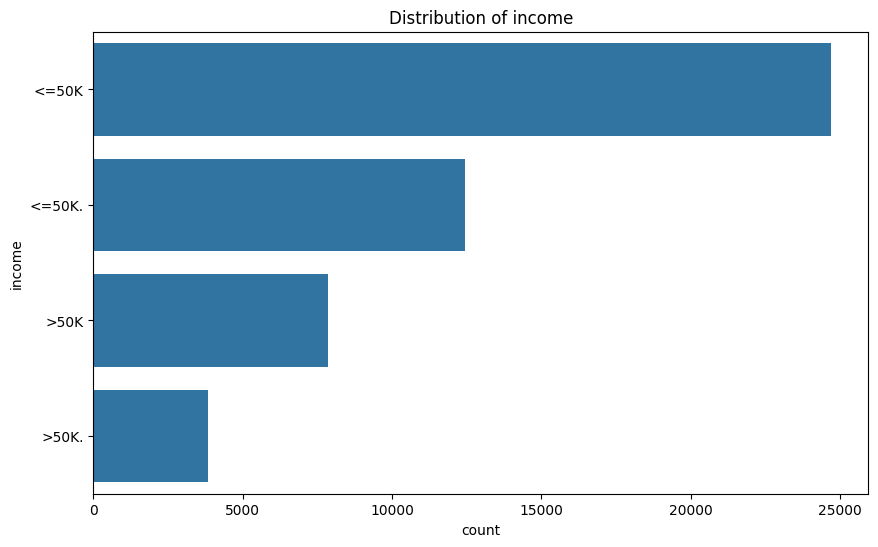

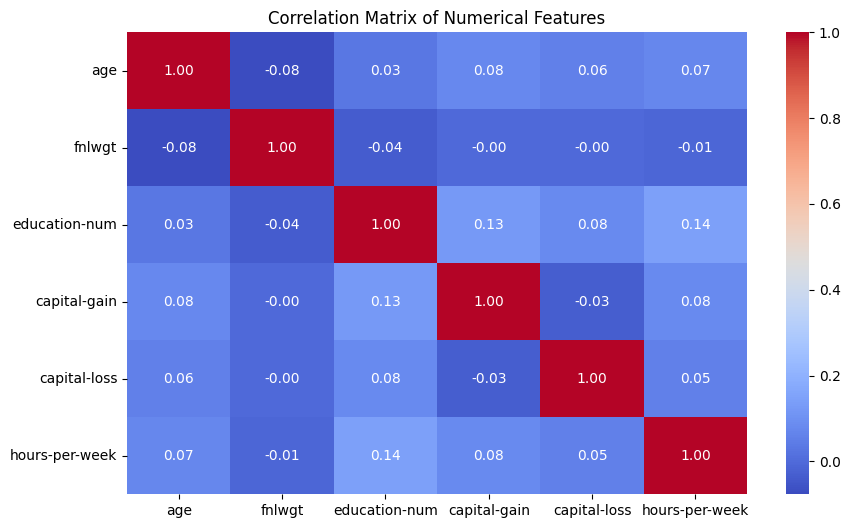


Unique Values in Categorical Columns:
workclass: 9 unique values
education: 16 unique values
marital-status: 7 unique values
occupation: 15 unique values
relationship: 6 unique values
race: 5 unique values
sex: 2 unique values
native-country: 42 unique values
income: 4 unique values


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'income.csv'
data = pd.read_csv(file_path)

# Display basic info about the dataset
print("Basic Information:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())

# Summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:")
print(data.describe(include=['object']))

# Visualizing the distribution of numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Visualizing the distribution of categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation matrix for numerical columns
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Checking for unique values in categorical features
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")



Dataset ini memiliki 48.842 baris dan missing value sebanyak 2203 data, sehingga menghapus data dengan nilai hilang berarti  kehilangan sekitar 4,5% dari total data, yang mungkin masih dapat diterima. Jadi saya memutuskan untuk menghapus data tersebut.

In [5]:
import pandas as pd

# Load the dataset
file_path = 'income.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values
data_cleaned = data.dropna()

# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'cleaned_income.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")


Cleaned dataset saved to cleaned_income.csv


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = "cleaned_income.csv"
df = pd.read_csv(file_path)

# Preprocess income column
if 'income' in df.columns:
    df['income'] = df['income'].str.replace('.', '', regex=False)
    df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Label encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split features and target
X = df.drop(columns=['income'])
y = df['income']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Create DataLoader for PyTorch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# PyTorch Model
class IncomeClassifier(nn.Module):
    def __init__(self, input_size):
        super(IncomeClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Define PyTorch model
input_size = X_train.shape[1]
model = IncomeClassifier(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train PyTorch model
epochs = 100
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

# Evaluate PyTorch model
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        predicted = (outputs > 0.5).float()
        y_pred.extend(predicted.numpy())
        y_true.extend(batch_y.numpy())

# Evaluation metrics for PyTorch
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)

print(f"PyTorch Model Evaluation: Accuracy={accuracy}, Precision={precision}, Recall={recall}, F1={f1}, AUC={auc}")

# TensorFlow Model with Dropout and Early Stopping
tf_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_size,)),
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = tf_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate TensorFlow model
y_pred_tf = (tf_model.predict(X_test) > 0.5).astype("int32")

# Evaluation metrics for TensorFlow
accuracy_tf = accuracy_score(y_test, y_pred_tf)
precision_tf = precision_score(y_test, y_pred_tf)
recall_tf = recall_score(y_test, y_pred_tf)
f1_tf = f1_score(y_test, y_pred_tf)
auc_tf = roc_auc_score(y_test, y_pred_tf)

print(f"TensorFlow Model Evaluation: Accuracy={accuracy_tf}, Precision={precision_tf}, Recall={recall_tf}, F1={f1_tf}, AUC={auc_tf}")


PyTorch Model Evaluation: Accuracy=0.843254593175853, Precision=0.696007696007696, Recall=0.6269497400346621, F1=0.6596763163893321, AUC=0.7696893635742107
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1191/1191 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7776 - loss: 0.4673 - val_accuracy: 0.8385 - val_loss: 0.3485
Epoch 2/100
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8314 - loss: 0.3678 - val_accuracy: 0.8425 - val_loss: 0.3358
Epoch 3/100
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8426 - loss: 0.3541 - val_accuracy: 0.8433 - val_loss: 0.3335
Epoch 4/100
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8455 - loss: 0.3465 - val_accuracy: 0.8427 - val_loss: 0.3316
Epoch 5/100
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8427 - loss: 0.3441 - val_accuracy: 0.8442 - val_loss: 0.3320
Epoch 6/100
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8466 - loss: 0.3407 - val_accuracy: 0.8448 - val_loss: 0.3290
Epoch 7/100
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8423 - loss: 0.3461 - val_accuracy: 0.8444 - val_loss: 0.3295
Epoch 8/100
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8463 - loss: 0.3408 - val_

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = "cleaned_income.csv"
df = pd.read_csv(file_path)

# Preprocess income column
if 'income' in df.columns:
    df['income'] = df['income'].str.replace('.', '', regex=False)
    df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Label encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split features and target
X = df.drop(columns=['income'])
y = df['income']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Create DataLoader for PyTorch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# PyTorch Model
class IncomeClassifier(nn.Module):
    def __init__(self, input_size):
        super(IncomeClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Define PyTorch model
input_size = X_train.shape[1]
model = IncomeClassifier(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train PyTorch model
epochs = 10
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

# Evaluate PyTorch model
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        predicted = (outputs > 0.5).float()
        y_pred.extend(predicted.numpy())
        y_true.extend(batch_y.numpy())

# Evaluation metrics for PyTorch
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)

print(f"PyTorch Model Evaluation: Accuracy={accuracy}, Precision={precision}, Recall={recall}, F1={f1}, AUC={auc}")


PyTorch Model Evaluation: Accuracy=0.8422047244094488, Precision=0.6783340717766947, Recall=0.6633448873483535, F1=0.6707557502738226, AUC=0.7813745359562884


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = "cleaned_income.csv"
df = pd.read_csv(file_path)

# Preprocess income column
if 'income' in df.columns:
    df['income'] = df['income'].str.replace('.', '', regex=False)
    df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Label encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split features and target
X = df.drop(columns=['income'])
y = df['income']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow Model with Dropout and Early Stopping
tf_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = tf_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate TensorFlow model
y_pred_tf = (tf_model.predict(X_test) > 0.5).astype("int32")

# Evaluation metrics for TensorFlow
accuracy_tf = accuracy_score(y_test, y_pred_tf)
precision_tf = precision_score(y_test, y_pred_tf)
recall_tf = recall_score(y_test, y_pred_tf)
f1_tf = f1_score(y_test, y_pred_tf)
auc_tf = roc_auc_score(y_test, y_pred_tf)

print(f"TensorFlow Model Evaluation: Accuracy={accuracy_tf}, Precision={precision_tf}, Recall={recall_tf}, F1={f1_tf}, AUC={auc_tf}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1191/1191 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7676 - loss: 0.4848 - val_accuracy: 0.8330 - val_loss: 0.3575
Epoch 2/100
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8243 - loss: 0.3782 - val_accuracy: 0.8385 - val_loss: 0.3374
Epoch 3/100
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8326 - loss: 0.3595 - val_accuracy: 0.8418 - val_loss: 0.3341
Epoch 4/100
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8389 - loss: 0.3482 - val_accuracy: 0.8434 - val_loss: 0.3318
Epoch 5/100
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8438 - loss: 0.3391 - val_accuracy: 0.8450 - val_loss: 0.3311
Epoch 6/100
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8433 - loss: 0.3399 - val_accuracy: 0.8457 - val_loss: 0.3303
Epoch 7/100
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8464 - loss: 0.3396 - val_accuracy: 0.8469 - val_loss: 0.3293
Epoch 8/100
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8435 - loss: 0.3410 - val_

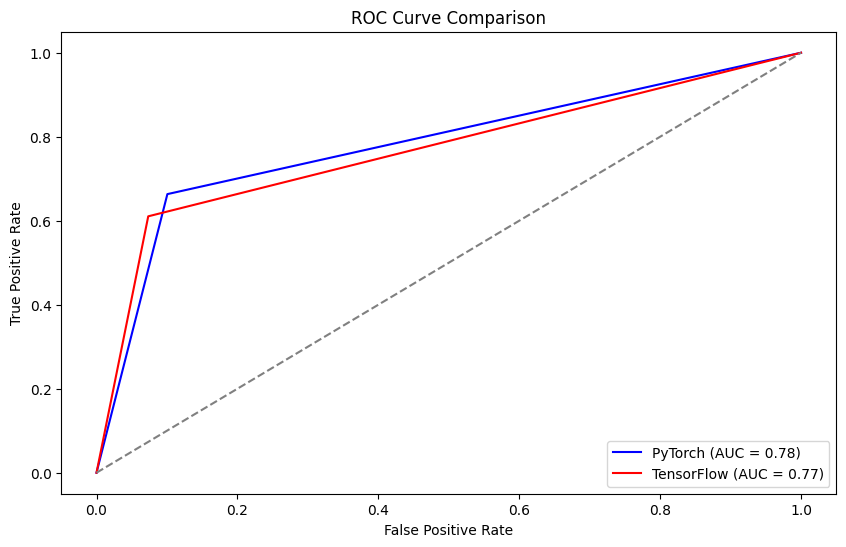


Summary of Evaluation Metrics:
      Metric   PyTorch  TensorFlow
0   Accuracy  0.842205    0.849974
1  Precision  0.678334    0.726663
2     Recall  0.663345    0.610485
3   F1-Score  0.670756    0.663527
4        AUC  0.781375    0.768524


In [12]:
# Plotting ROC Curve for both models
fpr_pytorch, tpr_pytorch, _ = roc_curve(y_true, y_pred)
fpr_tf, tpr_tf, _ = roc_curve(y_test, y_pred_tf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_pytorch, tpr_pytorch, color='blue', label=f'PyTorch (AUC = {auc:.2f})')
plt.plot(fpr_tf, tpr_tf, color='red', label=f'TensorFlow (AUC = {auc_tf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Summary of Evaluation Metrics
print("\nSummary of Evaluation Metrics:")

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'PyTorch': [accuracy, precision, recall, f1, auc],
    'TensorFlow': [accuracy_tf, precision_tf, recall_tf, f1_tf, auc_tf]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


### **4. Penjelasan Matriks Evaluasi**

1. **Akurasi (Accuracy)**: Mengukur proporsi prediksi yang benar dari seluruh data. Metrik ini baik jika data seimbang, namun bisa menyesatkan jika kelas target tidak seimbang.
   
2. **Presisi (Precision)**: Mengukur proporsi prediksi positif yang benar. Sangat penting jika kita ingin meminimalkan false positives (misalnya, jika kita tidak ingin memberikan label >50K pada yang sebenarnya <=50K).
   
3. **Recall (Sensitivitas)**: Mengukur proporsi positif yang benar-benar terdeteksi. Sangat penting jika kita ingin meminimalkan false negatives (misalnya, jika kita tidak ingin melewatkan orang yang sebenarnya >50K).
   
4. **F1-Score**: Rata-rata harmonik antara Precision dan Recall. F1 memberikan gambaran yang lebih seimbang mengenai performa model ketika ada trade-off antara Precision dan Recall.
   
5. **AUC (Area Under Curve)**: Mengukur kemampuan model untuk membedakan antara kelas-kelas. Nilai AUC mendekati 1 menunjukkan model yang sangat baik dalam membedakan antara kelas, sementara nilai mendekati 0.5 menunjukkan model yang kurang berguna.

### **Mana yang Terbaik?**
- **AUC** sering kali menjadi metrik yang sangat berguna, terutama pada dataset yang tidak seimbang, karena mengukur performa model pada berbagai ambang batas klasifikasi.
- **F1-Score** adalah metrik yang sangat berguna jika data tidak seimbang dan kedua kesalahan (false positive dan false negative) memiliki biaya yang signifikan.

Namun, pilihan terbaik sangat bergantung pada konteks masalah dan trade-off yang diperlukan antara **presisi** dan **recall**.

Berikut adalah penjelasan untuk setiap **persamaan matematika** yang digunakan pada kode PyTorch dan TensorFlow, serta penjelasan untuk metrik evaluasi yang diterapkan pada kedua model:

### **1. Persamaan Matematika dalam Kode PyTorch dan TensorFlow**

#### **Model PyTorch dan TensorFlow**:

Kedua model, baik yang menggunakan **PyTorch** maupun **TensorFlow**, memiliki struktur **feedforward neural network** dengan 3 lapisan (input, hidden, dan output). Pada umumnya, **persamaan matematis yang digunakan dalam neural network** adalah sebagai berikut:

- **Forward Pass**:
  
  Untuk setiap lapisan dalam jaringan, output dihitung sebagai berikut:
  
  $$
  z = W \cdot x + b
  $$
  Dimana:
  - $W$ adalah matriks bobot (weights),
  - $x$ adalah input untuk lapisan tersebut,
  - $b$ adalah bias (bias),
  - $z$ adalah output sebelum aktivasi (logit).

  Kemudian, **fungsi aktivasi** digunakan untuk menghasilkan output yang dilewatkan ke lapisan berikutnya. Fungsi aktivasi yang digunakan adalah **ReLU** (Rectified Linear Unit) pada lapisan tersembunyi dan **Sigmoid** pada lapisan output.

  - **ReLU**:
  
  $$
  \text{ReLU}(z) = \max(0, z)
  $$
  Fungsi ini mengaktifkan neuron jika output lebih besar dari 0, jika tidak, neuron akan tetap tidak aktif.

  - **Sigmoid**:
  
  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$
  Fungsi sigmoid digunakan di lapisan output untuk menghasilkan output antara 0 dan 1, yang dapat diinterpretasikan sebagai probabilitas kelas.

#### **Cost Function (Loss Function)**:
  
  - Pada **PyTorch** dan **TensorFlow**, digunakan **Binary Cross Entropy Loss** untuk mengukur kesalahan antara output model dan nilai target sebenarnya.
  
  $$
  L = - \left( y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right)
  $$
  Dimana:
  - $y$ adalah label sebenarnya (0 atau 1),
  - $\hat{y}$ adalah probabilitas prediksi yang diberikan oleh model (output dari fungsi sigmoid).
  
  Cross entropy digunakan untuk masalah klasifikasi biner dan mengukur seberapa baik model dalam memprediksi label yang benar. Jika probabilitas prediksi $ \hat{y} $ mendekati 1 untuk label positif dan mendekati 0 untuk label negatif, maka nilai loss akan kecil, yang berarti model bekerja dengan baik.

#### **Backpropagation**:
  
  - Untuk mengoptimalkan bobot dan bias, kita menggunakan **gradient descent**. Dalam backpropagation, gradien dari fungsi loss dihitung untuk masing-masing bobot dan bias, lalu diperbarui untuk meminimalkan loss. Gradien dihitung dengan aturan rantai (chain rule), yang memungkinkan kita untuk menghitung perubahan pada bobot dan bias berdasarkan kontribusi masing-masing terhadap kesalahan.

### **2. Evaluasi Model (Metrik Evaluasi)**

#### **Akurasi (Accuracy)**:
  
Akurasi mengukur **persentase prediksi yang benar** dari semua data. Rumusnya adalah:

$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

Dimana:
- **TP (True Positive)**: Prediksi positif yang benar (model memprediksi >50K dan sebenarnya >50K),
- **TN (True Negative)**: Prediksi negatif yang benar (model memprediksi <=50K dan sebenarnya <=50K),
- **FP (False Positive)**: Prediksi positif yang salah (model memprediksi >50K tetapi sebenarnya <=50K),
- **FN (False Negative)**: Prediksi negatif yang salah (model memprediksi <=50K tetapi sebenarnya >50K).

Akurasi memberi gambaran umum tentang performa model, tetapi tidak selalu efektif jika data sangat tidak seimbang.

#### **Presisi (Precision)**:
  
Presisi mengukur berapa banyak dari prediksi positif yang benar. Ini berguna ketika kita ingin meminimalkan **false positives** (misalnya, ketika salah memprediksi >50K padahal sebenarnya <=50K):

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

#### **Recall (Sensitivitas)**:
  
Recall mengukur berapa banyak dari **positive class** yang terdeteksi dengan benar oleh model. Ini penting ketika kita ingin meminimalkan **false negatives** (misalnya, ketika kita ingin menghindari tidak mengidentifikasi orang yang seharusnya berpendapatan >50K):

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

#### **F1-Score**:
  
F1-score adalah **rata-rata harmonik antara Precision dan Recall**. Ini sangat berguna ketika kita ingin menyeimbangkan kedua metrik tersebut. Formula F1-score adalah:

$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

F1-score memberikan gambaran yang lebih baik ketika ada trade-off antara presisi dan recall, seperti pada dataset yang tidak seimbang.

#### **AUC (Area Under Curve)**:
  
AUC mengukur kemampuan model untuk membedakan antara dua kelas. **ROC Curve** adalah plot dari **True Positive Rate (Recall)** terhadap **False Positive Rate**. **AUC** adalah area di bawah kurva ROC. Nilai AUC berkisar antara 0 dan 1, dengan 1 berarti model sangat baik dalam membedakan antara kelas, dan 0.5 berarti model tidak lebih baik dari tebakan acak.

$$
\text{AUC} = \int_0^1 \text{TPR}(FPR) \, dFPR
$$

#### **ROC Curve**:
  
**ROC Curve** adalah plot **True Positive Rate (Recall)** terhadap **False Positive Rate** pada berbagai ambang batas. Ini memberi gambaran yang jelas tentang bagaimana perubahan ambang batas mempengaruhi keseimbangan antara **recall** dan **false positive rate**.

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}, \quad \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$

### **Mana yang Terbaik?**

- **AUC** sering kali lebih baik untuk dataset yang tidak seimbang, karena mengukur kemampuan model dalam membedakan antara dua kelas tanpa dipengaruhi oleh ambang batas klasifikasi.
- **F1-Score** adalah metrik terbaik ketika kita ingin menyeimbangkan **precision** dan **recall**, terutama pada masalah klasifikasi dengan kelas tidak seimbang.
- **Akurasi** adalah metrik yang baik jika data seimbang, tetapi bisa menyesatkan jika salah satu kelas lebih dominan daripada yang lainnya.

Pada umumnya, jika kita bekerja dengan data yang tidak seimbang, **AUC** dan **F1-Score** adalah pilihan terbaik, sementara jika data lebih seimbang, **Akurasi** bisa cukup informatif.

Apakah penjelasan ini jelas dan sudah mencakup semua pertanyaan Anda? Jika ada yang perlu diperjelas, saya siap membantu!